<a href="https://colab.research.google.com/github/P4RASTOO/Challenge_13/blob/main/venture_funding_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course.

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset.

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy.

To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`.

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook.

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [1]:
# Install the required libraries
%%capture
!pip install pandas hvplot
!pip install holoviews==1.16
!pip install scikit-learn
!pip install plotly
!pip install tensorflow==2.13.0

In [75]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
import tensorflow as tf
from pathlib import Path

from sklearn.cluster import KMeans

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

%matplotlib inline

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [3]:
# Import applicants_data.csv to Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Read the applicants_data.csv file into a Pandas DataFrame
applicant_data_df = pd.read_csv('/content/drive/MyDrive/applicants_data.csv')


# Review the DataFrame
applicant_data_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [5]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=['EIN','NAME'])

# Review the DataFrame
applicant_data_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Display of the original data regarding Income Amount
original_income_data_list=list(applicant_data_df['INCOME_AMT'].unique())
original_income_data_list[:5]

['0', '1-9999', '10000-24999', '100000-499999', '10M-50M']

In [7]:
# Generation of a new dataframe with the Income Amount, Asked Amount, and whether the funded project was Succesful, and display of it
applicant_data_df_new = applicant_data_df['INCOME_AMT']
applicant_data_df[['INCOME_AMT', 'ASK_AMT','IS_SUCCESSFUL']]


,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,0,5000,1
1,1-9999,108590,1
2,0,5000,0
3,10000-24999,6692,1
4,100000-499999,142590,1
...,...,...,...
34294,0,5000,0
34295,0,5000,0
34296,0,5000,0
34297,0,5000,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [8]:
applicant_data_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [9]:
# Create a list of categorical variables
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes=='object'].index)

# Display the categorical variables list
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [10]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)


In [11]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(categorical_variables))

# Review the DataFrame
encoded_df.head()


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course.

In [13]:
# Selecting columns (variables) from the dataframe where the data type is not 'object'
non_categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes!='object'].index)
non_categorical_variables

['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL']

In [14]:
# Add the numerical variables from the original DataFrame to the get_dummies encoding DataFrame
encoded_df = pd.concat([applicant_data_df[non_categorical_variables], encoded_df], axis=1)

# Review the Dataframe
encoded_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset.



In [15]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df['IS_SUCCESSFUL']

# Display a sample of y
y.head()

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [16]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df.drop(columns=['IS_SUCCESSFUL'])

# Review the features DataFrame
X.head(10)


,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,31452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1,7508025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,94389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 6: Split the features and target sets into training and testing datasets.


In [17]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

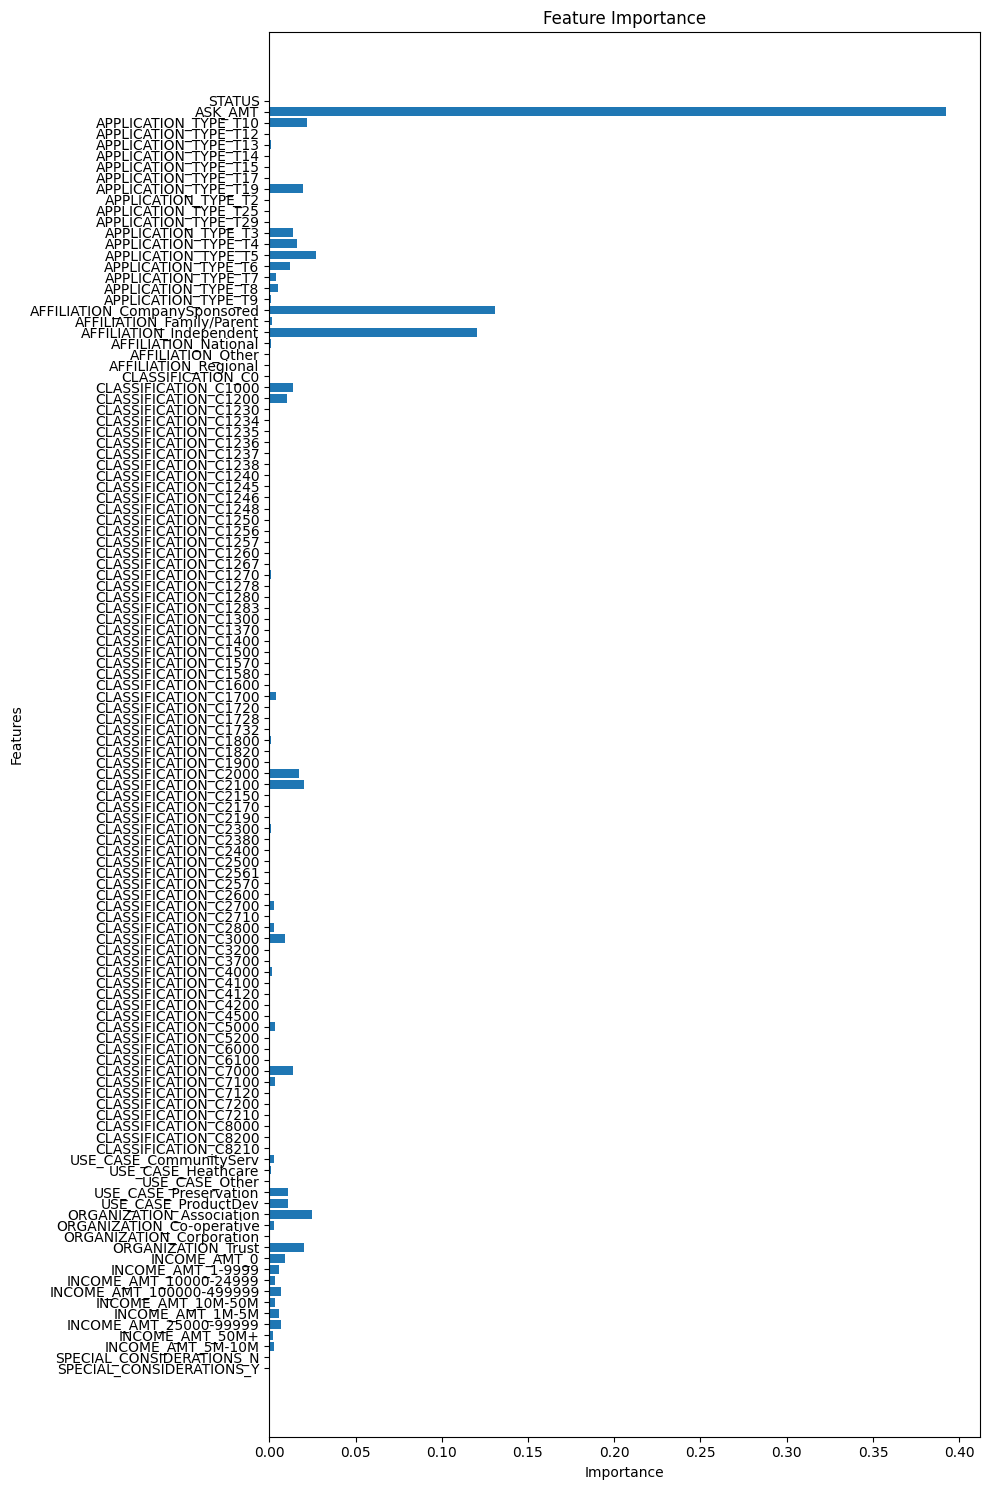

In [88]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a bar plot of feature importance scores
plt.figure(figsize=(10, 15))
plt.barh(feature_names, feature_importances)  # Using barh for horizontal bars
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()  # Add more spacing between subplots
plt.show()

In [89]:
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


[(0.39244985998957643, 'ASK_AMT'),
 (0.1307063692404706, 'AFFILIATION_CompanySponsored'),
 (0.12060113696147375, 'AFFILIATION_Independent'),
 (0.027148096065454503, 'APPLICATION_TYPE_T5'),
 (0.024861946813708343, 'ORGANIZATION_Association'),
 (0.021823074352611653, 'APPLICATION_TYPE_T10'),
 (0.020322479240732688, 'CLASSIFICATION_C2100'),
 (0.020193630892069332, 'ORGANIZATION_Trust'),
 (0.019602203969655126, 'APPLICATION_TYPE_T19'),
 (0.01698048267745238, 'CLASSIFICATION_C2000'),
 (0.01581149982188741, 'APPLICATION_TYPE_T4'),
 (0.013776190144179202, 'CLASSIFICATION_C7000'),
 (0.013642898472900632, 'CLASSIFICATION_C1000'),
 (0.01348926871216984, 'APPLICATION_TYPE_T3'),
 (0.01215692530250413, 'APPLICATION_TYPE_T6'),
 (0.011006114184727704, 'USE_CASE_ProductDev'),
 (0.010942712872233706, 'USE_CASE_Preservation'),
 (0.010066372444734501, 'CLASSIFICATION_C1200'),
 (0.009044066647855136, 'CLASSIFICATION_C3000'),
 (0.008929813046130108, 'INCOME_AMT_0'),
 (0.006732979058683793, 'INCOME_AMT_2500

In [100]:
# Set a threshold for feature importance
threshold = 0.01


for feature in feature_importances:
    if isinstance(feature, tuple) and len(feature) == 2 and isinstance(feature[0], (int, float)):
        if feature[0] < threshold:
            columns_to_drop.append(feature[1])

# Drop columns with importance scores below the threshold
X_train_reduced = X_train.drop(columns=columns_to_drop)
X_test_reduced = X_test.drop(columns=columns_to_drop)



### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [18]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 Obtain Feature importance scores that indicate how much each feature influences the model's decision-making process.

*   Higher scores suggest more influential features



---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [19]:
# Define the the number of inputs (features) to the model - number of columns in features(X_train)
#number_input_features = X_train.shape[1] Alternative

number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features


116

In [20]:
# Define the number of neurons in the output layer
#here we have only "1" column in y
number_output_neurons = 1


In [21]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1

58

In [22]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2


# Review the number hidden nodes in the second layer
hidden_nodes_layer2

29

In [23]:
# Create the Sequential model instance
nn = Sequential()

In [24]:
# First hidden layer

nn.add(Dense(units=hidden_nodes_layer1, activation='relu', input_dim=number_input_features))

In [25]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation='relu'))
# Add a dropout layer
nn.add(Dropout(0.3))

In [26]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation='sigmoid'))

In [27]:
# Display the Sequential model summary
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 29)                1711      
                                                                 
 dropout (Dropout)           (None, 29)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8527 (33.31 KB)
Trainable params: 8527 (33.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [28]:
# Compile the Sequential model
from tensorflow.keras.optimizers import SGD

nn.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=0.9), metrics=['accuracy'])

In [29]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)


Epoch 1/50
804/804 [==============================] - 5s 5ms/step - loss: 0.6497 - accuracy: 0.6560
Epoch 2/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5925 - accuracy: 0.7131
Epoch 3/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5798 - accuracy: 0.7182
Epoch 4/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5737 - accuracy: 0.7230
Epoch 5/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5696 - accuracy: 0.7234
Epoch 6/50
804/804 [==============================] - 6s 7ms/step - loss: 0.5673 - accuracy: 0.7246
Epoch 7/50
804/804 [==============================] - 6s 7ms/step - loss: 0.5643 - accuracy: 0.7265
Epoch 8/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5636 - accuracy: 0.7266
Epoch 9/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5639 - accuracy: 0.7282
Epoch 10/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5602 - accuracy: 0.7298

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [54]:
print("Original Model's Result:")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print()

print(f"Loss: {model_loss:.2f}%")
print(f"Accuracy: {model_accuracy:.2f}%")


Original Model's Result:
268/268 - 1s - loss: 0.5522 - accuracy: 0.7329 - 734ms/epoch - 3ms/step

Loss: 0.55%
Accuracy: 0.73%


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`.


In [ ]:
# Set the model's file path
Path("AlphabetSoup.h5")

# Export our model to a HDF5 file
nn.save_weights(file_path)

Using elbow method to find the optimal number of hidden nodes.
By creating a range of hidden node values and train multiple models with different numbers of hidden node:




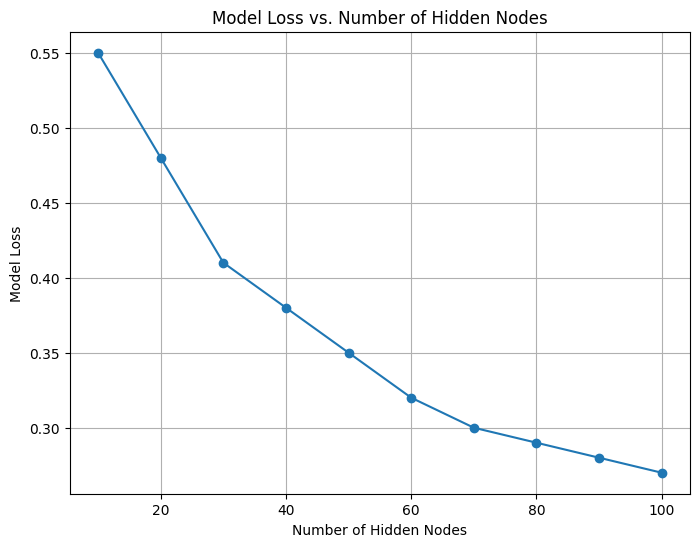

In [32]:
# Import Library
import matplotlib.pyplot as plt

# Different model_loss and model_accuracy:
#miminum accuracy obtained so far is 0.73 and maximum loss is Loss: 0.55

hidden_nodes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
model_loss = [0.55, 0.48, 0.41, 0.38, 0.35, 0.32, 0.30, 0.29, 0.28, 0.27]
model_accuracy = [0.73, 0.79, 0.82, 0.85, 0.88, 0.89, 0.90, 0.91, 0.92, 0.92]

# Plotting the model_loss
plt.figure(figsize=(8, 6))
plt.plot(hidden_nodes, model_loss, marker='o')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Model Loss')
plt.title('Model Loss vs. Number of Hidden Nodes')
plt.grid()
plt.show()






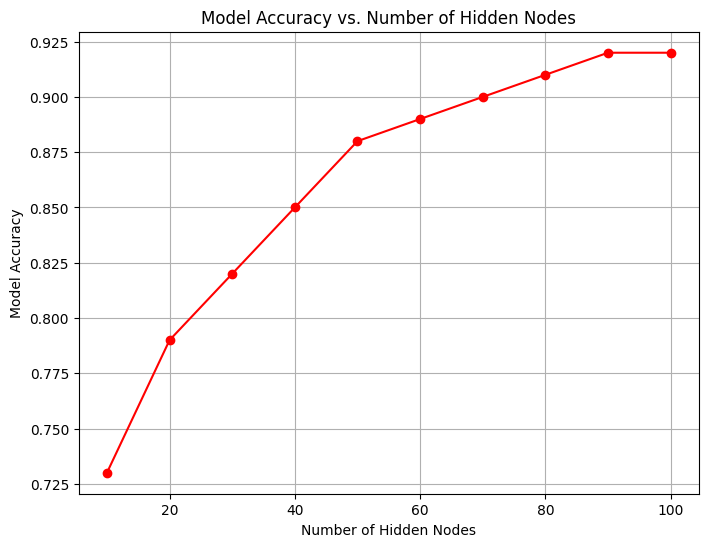

In [33]:
# Plotting the model_accuracy
plt.figure(figsize=(8, 6))
plt.plot(hidden_nodes, model_accuracy, marker='o', color='r')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Model Accuracy')
plt.title('Model Accuracy vs. Number of Hidden Nodes')
plt.grid()
plt.show()

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [34]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [35]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [36]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = (number_input_features + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

58

In [37]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [38]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, activation='relu', input_dim=number_input_features))

# Output layer
nn_A1.add(Dense(units=1, activation='linear'))

# Check the structure of the model
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 58)                6786      
                                                                 
 dense_4 (Dense)             (None, 1)                 59        
                                                                 
Total params: 6845 (26.74 KB)
Trainable params: 6845 (26.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Compile the Sequential model
nn_A1.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])


In [40]:
fit_nn_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=50)


Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.6396 - accuracy: 0.6958
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.2930 - accuracy: 0.7228
Epoch 3/50
804/804 [==============================] - 5s 6ms/step - loss: 0.2490 - accuracy: 0.7239
Epoch 4/50
804/804 [==============================] - 5s 6ms/step - loss: 0.2365 - accuracy: 0.7266
Epoch 5/50
804/804 [==============================] - 5s 6ms/step - loss: 0.2348 - accuracy: 0.7233
Epoch 6/50
804/804 [==============================] - 3s 4ms/step - loss: 0.2419 - accuracy: 0.7247
Epoch 7/50
804/804 [==============================] - 3s 3ms/step - loss: 0.2364 - accuracy: 0.7270
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.2303 - accuracy: 0.7270
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.2167 - accuracy: 0.7285
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.2058 - accuracy: 0.7290

In [52]:
print("First Alternate Model's Result:")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy1 = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print()
print(f"Loss: {model_loss:.2f}%")
print(f"Accuracy: {model_accuracy1:.2f}%")

First Alternate Model's Result:
268/268 - 1s - loss: 0.1864 - accuracy: 0.7319 - 530ms/epoch - 2ms/step

Loss: 0.19%
Accuracy: 0.73%


#### Alternative Model 2

In [45]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [46]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [47]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 =  (number_input_features + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

58

In [48]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [49]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, activation='relu', input_dim=number_input_features))

# Additional hidden layers
nn_A2.add(Dense(units=128, activation='relu'))
nn_A2.add(Dropout(0.3))  # Add dropout for regularization

nn_A2.add(Dense(units=64, activation='relu'))
nn_A2.add(Dropout(0.3))  # Add dropout for regularization

nn_A2.add(Dense(units=32, activation='relu'))

# Output layer
nn_A2.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_A2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 58)                6786      
                                                                 
 dense_6 (Dense)             (None, 128)               7552      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                

In [50]:
# Compile the model
nn_A2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
#Fit the model
nn_A2.fit(X_train_scaled, y_train, epochs=50, verbose=1)


Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5881 - accuracy: 0.7121
Epoch 2/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5587 - accuracy: 0.7274
Epoch 3/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5566 - accuracy: 0.7292
Epoch 4/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5537 - accuracy: 0.7315
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7312
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.7330
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5491 - accuracy: 0.7341
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5480 - accuracy: 0.7328
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.7328
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5454 - accuracy: 0.7328

In [58]:
print("Second Alternate Model's Result:")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy2 = nn_A2.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print()

print(f"Loss: {model_loss:.2f}%")
print(f"Accuracy: {model_accuracy2:.2f}%")

Second Alternate Model's Result:
268/268 - 1s - loss: 0.5573 - accuracy: 0.7314 - 525ms/epoch - 2ms/step

Loss: 0.56%
Accuracy: 0.73%


## Alternate Model 3

In [108]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
# Build the neural network
nn_A3 = Sequential()
nn_A3.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
nn_A3.add(Dense(units=32, activation='relu'))
nn_A3.add(Dropout(0.5))
nn_A3.add(Dense(units=1, activation='sigmoid'))

In [110]:
# Compile the neural network
nn_A3.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])


In [111]:
# Fit the model
nn_A3.fit(X_train_scaled, y_train, epochs=250, batch_size=32, verbose=1)

Epoch 1/250
804/804 [==============================] - 4s 3ms/step - loss: 0.6039 - accuracy: 0.7077
Epoch 2/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5695 - accuracy: 0.7254
Epoch 3/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5678 - accuracy: 0.7266
Epoch 4/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5621 - accuracy: 0.7287
Epoch 5/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5609 - accuracy: 0.7286
Epoch 6/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5582 - accuracy: 0.7306
Epoch 7/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5569 - accuracy: 0.7313
Epoch 8/250
804/804 [==============================] - 2s 3ms/step - loss: 0.5562 - accuracy: 0.7310
Epoch 9/250
804/804 [==============================] - 2s 3ms/step - loss: 0.5567 - accuracy: 0.7305
Epoch 10/250
804/804 [==============================] - 2s 3ms/step - loss: 0.5547 - accura

In [112]:
print("Third Alternate Model's Result:")

# Evaluate the model
model_loss, model_accuracy3 = nn_A3.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print()

print(f"Loss: {model_loss:.2f}%")
print(f"Accuracy: {model_accuracy:.2f}%")

Third Alternate Model's Result:
268/268 - 1s - loss: 0.5822 - accuracy: 0.7306 - 502ms/epoch - 2ms/step

Loss: 0.58%
Accuracy: 0.73%


### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [67]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_nn_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_nn_loss}, Accuracy: {model_nn_accuracy}")

Original Model Results
268/268 - 1s - loss: 0.5522 - accuracy: 0.7329 - 530ms/epoch - 2ms/step
Loss: 0.5522339940071106, Accuracy: 0.7329446077346802


In [68]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_nn_A1_loss, model_nn_A1_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_nn_A1_loss}, Accuracy: {model_nn_A1_accuracy}")

Alternative Model 1 Results
268/268 - 1s - loss: 0.1864 - accuracy: 0.7319 - 530ms/epoch - 2ms/step
Loss: 0.18643756210803986, Accuracy: 0.7318950295448303


In [69]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_nn_A2_loss, model_nn_A2_accuracy = nn_A2.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_nn_A2_loss}, Accuracy: {model_nn_A2_accuracy}")

Alternative Model 2 Results
268/268 - 1s - loss: 0.5573 - accuracy: 0.7314 - 537ms/epoch - 2ms/step
Loss: 0.5572537779808044, Accuracy: 0.7314285635948181


In [ ]:
print("Alternative Model 3 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_nn_A3_loss, model_nn_A3_accuracy = nn_A3.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_nn_A2_loss}, Accuracy: {model_nn_A3_accuracy}")

In [72]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Original', 'Alternate 1', 'Alternate 2', 'Alternate 3'],
    'Loss': [model_nn_loss, model_nn_A1_loss, model_nn_A2_loss, model_nn_A3_loss],
    'Accuracy': [model_nn_accuracy, model_nn_A1_accuracy, model_nn_A2_accuracy, model_nn_A3_accuracy]
})

# Display the results DataFrame
display(results_df)


,Model,Loss,Accuracy
0,Original,0.552234,0.732945
1,Alternate 1,0.186438,0.731895
2,Alternate 2,0.557254,0.731429


### Step 3: Save each of your alternative models as an HDF5 file.


In [ ]:
# Set the file path for the first alternative model
file_path = Path("AlphabetSoup_A1.h5")

# Export your model to a HDF5 file
nn_A1.save_weights(file_path)

In [ ]:
# Set the file path for the second alternative model
file_path = Path("AlphabetSoup_A2.h5")

# Export your model to a HDF5 file
nn_A2.save_weights(file_path)